In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
data = pd.read_csv("SQLiV3.csv")
data.head()

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    30904 non-null  object 
 1   Label       30664 non-null  object 
 2   Unnamed: 2  306 non-null    object 
 3   Unnamed: 3  9 non-null      float64
dtypes: float64(1), object(3)
memory usage: 966.3+ KB


In [ ]:
data['Label'].describe()

count     30664
unique       42
top           0
freq      19268
Name: Label, dtype: object

In [ ]:
data['Label'].isna().sum()

255

In [ ]:
unique_label = pd.unique(data['Label'])

In [ ]:
data = data.drop(data[(data['Label'] != '0') & (data['Label'] != '1')].index)

In [ ]:
data['Label'] = data['Label'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    30609 non-null  object 
 1   Label       30609 non-null  int64  
 2   Unnamed: 2  0 non-null      object 
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
data[data['Label'] == 1].count()

Sentence      11341
Label         11341
Unnamed: 2        0
Unnamed: 3        0
dtype: int64

In [ ]:
data[data['Label'] == 0].count()

Sentence      19268
Label         19268
Unnamed: 2        0
Unnamed: 3        0
dtype: int64

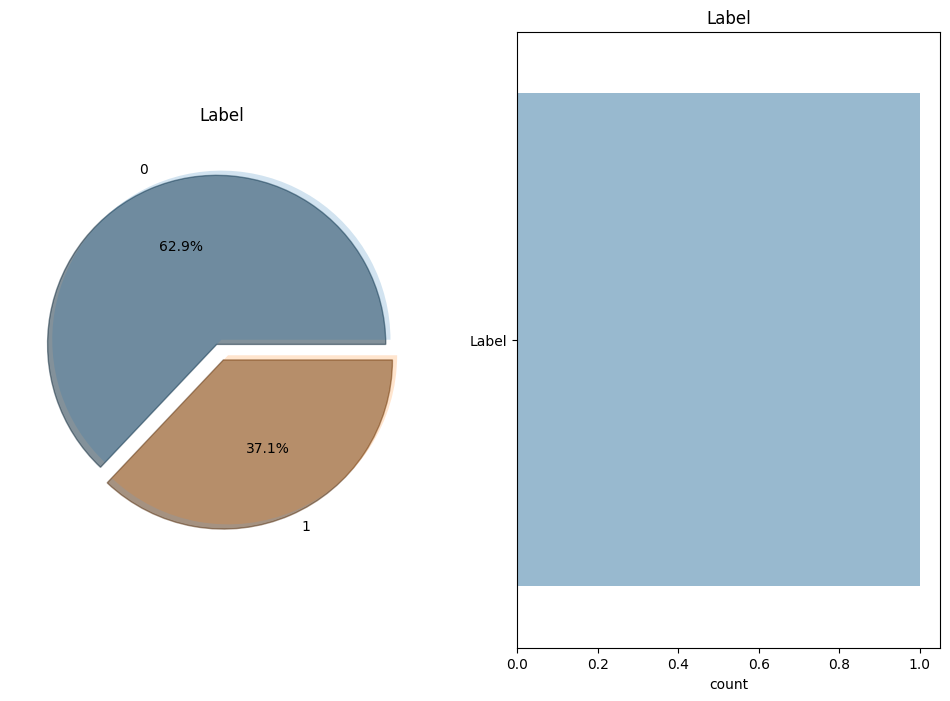

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,8))
data['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot('Label',ax=ax[1], alpha=0.5)
ax[1].set_title('Label')
plt.show()

In [ ]:
data.head()

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
5,select name from syscolumns where id = ...,1,NaN,NaN


In [ ]:
comment_values = data[data.Sentence.str.contains('#|--|//')]

In [ ]:
comment_values.count()[0]

5905